# Overview & Format data

In [291]:
import pandas as pd

df = pd.read_csv('Customers.csv')
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [292]:
# Check each rows have duplicated customerID or not?

len(df['CustomerID'].unique())

2000

So each rows are collected from different customers 

In [293]:
df = df.drop('CustomerID',axis=1)
df

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,Male,19,15000,39,Healthcare,1,4
1,Male,21,35000,81,Engineer,3,3
2,Female,20,86000,6,Engineer,1,1
3,Female,23,59000,77,Lawyer,0,2
4,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...
1995,Female,71,184387,40,Artist,8,7
1996,Female,91,73158,32,Doctor,7,7
1997,Male,87,90961,14,Healthcare,9,2
1998,Male,77,182109,4,Executive,7,2


In [294]:
df.columns

Index(['Gender', 'Age', 'Annual Income ($)', 'Spending Score (1-100)',
       'Profession', 'Work Experience', 'Family Size'],
      dtype='object')

In [295]:
df.dtypes

Gender                    object
Age                        int64
Annual Income ($)          int64
Spending Score (1-100)     int64
Profession                object
Work Experience            int64
Family Size                int64
dtype: object

From above , My data is mixed data 

Category :

Gender , Profession 

Numeric :

Age , Annual Income ($) , Spending Score (1-100) , Work Experience , Family Size  

So I choose clustering algorithm which can handle mixed data , This algorithm is K-prototypes

In [296]:
# Check null value 

df.isnull().sum()

Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

Label encoding is a simple technique where each unique category is assigned an integer label. This technique works well when the categories have a natural ordering, such as in the case of ordinal variables. However, label encoding can be problematic for nominal variables (variables without a natural ordering), as it introduces an artificial ordering that can bias the results of the clustering algorithm.

Dummy variables, on the other hand, create a binary variable for each category of the original variable, indicating whether the category is present or not. This technique works well for nominal variables, as it preserves the original information content of the variable without introducing any artificial ordering. However, it can lead to a high-dimensional data representation when dealing with categorical variables with many categories.

In summary, if your categorical variables are ordinal, label encoding may be a suitable option. However, if your categorical variables are nominal, or if you have many categories, dummy variables may be a better choice.

In [297]:
from sklearn.preprocessing import MinMaxScaler

# Separate the continuous and categorical variables
cat_cols = ['Gender' , 'Profession']
num_cols = ['Age' , 'Annual Income ($)' , 'Spending Score (1-100)' , 'Work Experience' , 'Family Size']  

# Replace the null values with text 'Missing'
df = df.fillna({'Profession': 'Missing'})

# Encode categorical columns
df = pd.get_dummies(df)

sc = MinMaxScaler()

scaled_data = sc.fit_transform(df)

# loop over each column of the original DataFrame
for i, col in enumerate(df.columns):
     df[col]  = scaled_data[:, i]

In [298]:
df.isnull().sum()

Age                         0
Annual Income ($)           0
Spending Score (1-100)      0
Work Experience             0
Family Size                 0
Gender_Female               0
Gender_Male                 0
Profession_Artist           0
Profession_Doctor           0
Profession_Engineer         0
Profession_Entertainment    0
Profession_Executive        0
Profession_Healthcare       0
Profession_Homemaker        0
Profession_Lawyer           0
Profession_Marketing        0
Profession_Missing          0
dtype: int64

In [299]:
df

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Female,Gender_Male,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Profession_Missing
0,0.191919,0.078958,0.39,0.058824,0.375,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.212121,0.184236,0.81,0.176471,0.250,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.202020,0.452694,0.06,0.058824,0.000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.232323,0.310569,0.77,0.000000,0.125,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.313131,0.200027,0.40,0.117647,0.625,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.717172,0.970591,0.40,0.470588,0.750,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.919192,0.385095,0.32,0.411765,0.750,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.878788,0.478808,0.14,0.529412,0.125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1998,0.777778,0.958600,0.04,0.411765,0.125,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [300]:
df.columns[5:17]

Index(['Gender_Female', 'Gender_Male', 'Profession_Artist',
       'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing', 'Profession_Missing'],
      dtype='object')

# Clustering with K-prototypes

initialization : Cao        , clusters : 2     , silhouette score : 0.282


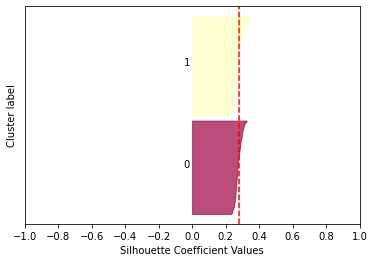

initialization : Huang      , clusters : 2     , silhouette score : 0.282


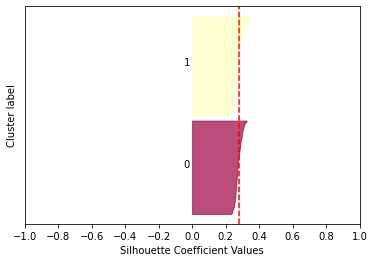

initialization : random     , clusters : 2     , silhouette score : 0.282


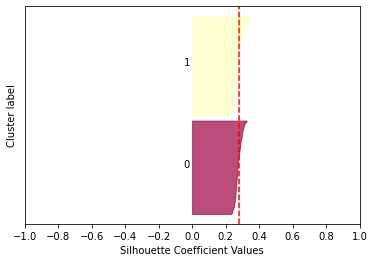

initialization : Cao        , clusters : 3     , silhouette score : 0.142


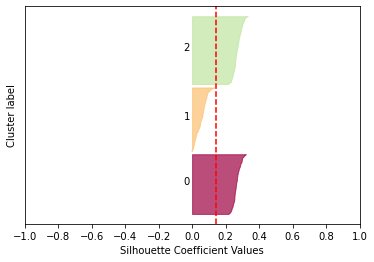

initialization : random     , clusters : 3     , silhouette score : 0.142


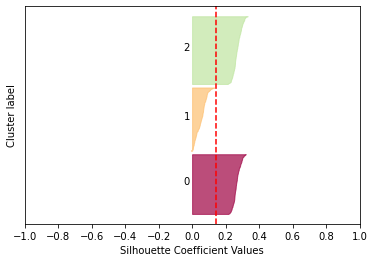

initialization : Huang      , clusters : 3     , silhouette score : 0.142


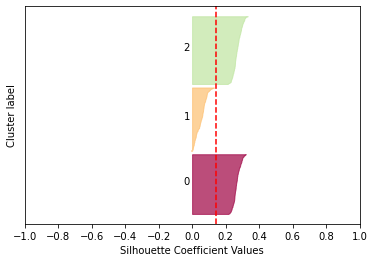

initialization : Huang      , clusters : 4     , silhouette score : 0.058


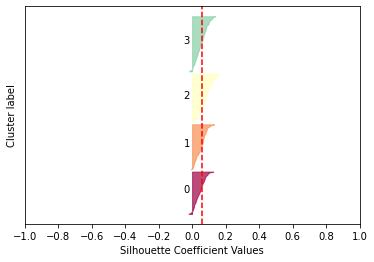

initialization : Cao        , clusters : 4     , silhouette score : 0.058


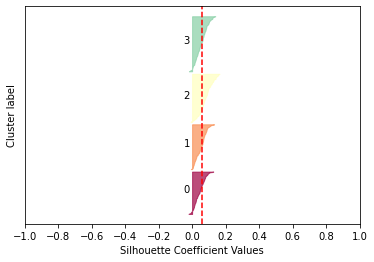

initialization : random     , clusters : 4     , silhouette score : 0.058


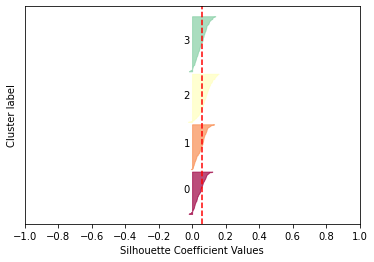

initialization : Cao        , clusters : 5     , silhouette score : 0.052


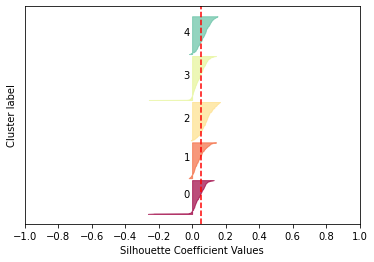

initialization : random     , clusters : 5     , silhouette score : 0.051


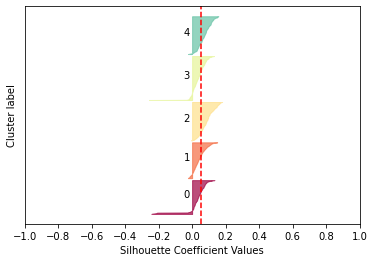

initialization : Huang      , clusters : 5     , silhouette score : 0.051


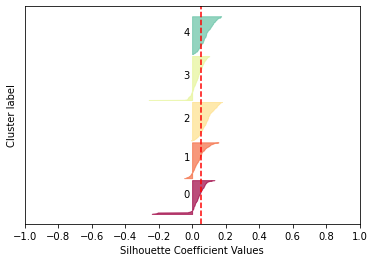

initialization : random     , clusters : 6     , silhouette score : 0.049


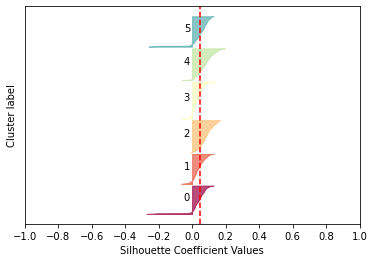

initialization : Huang      , clusters : 6     , silhouette score : 0.048


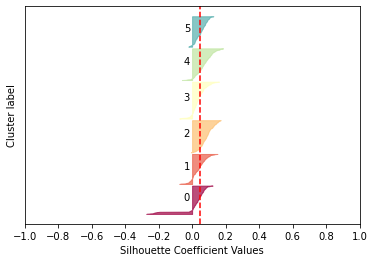

initialization : Cao        , clusters : 6     , silhouette score : 0.046


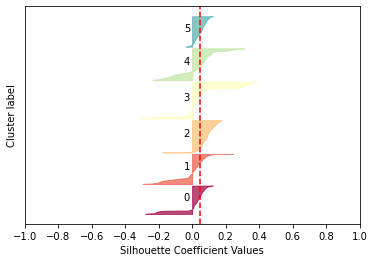

initialization : random     , clusters : 7     , silhouette score : 0.045


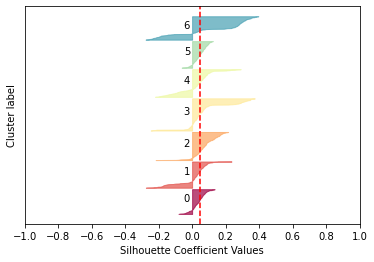

initialization : Huang      , clusters : 7     , silhouette score : 0.043


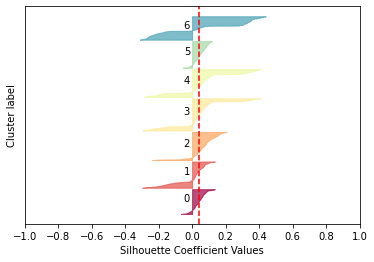

initialization : random     , clusters : 8     , silhouette score : 0.04 


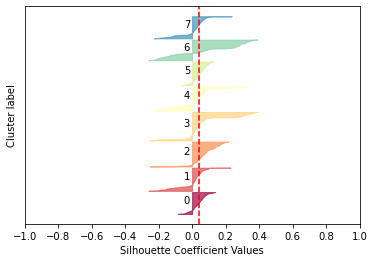

initialization : Huang      , clusters : 8     , silhouette score : 0.037


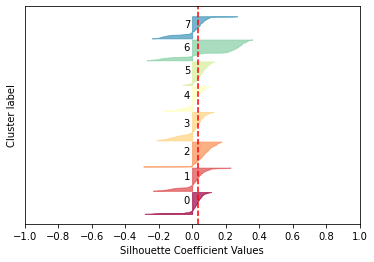

initialization : Cao        , clusters : 7     , silhouette score : 0.036


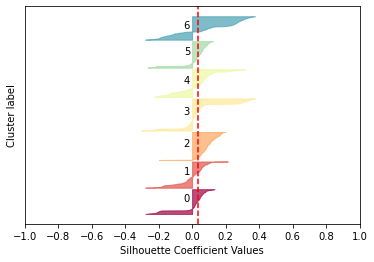

initialization : Huang      , clusters : 9     , silhouette score : 0.036


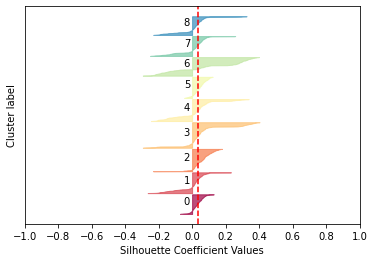

initialization : random     , clusters : 9     , silhouette score : 0.035


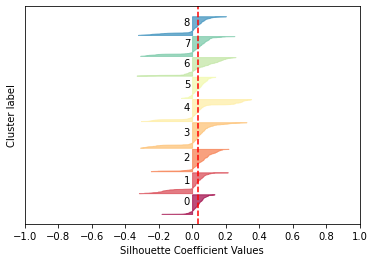

initialization : Huang      , clusters : 10    , silhouette score : 0.035


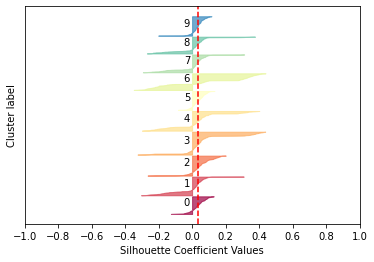

initialization : Cao        , clusters : 8     , silhouette score : 0.032


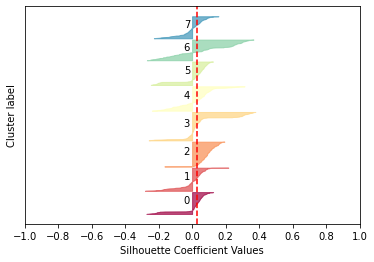

initialization : random     , clusters : 10    , silhouette score : 0.03 


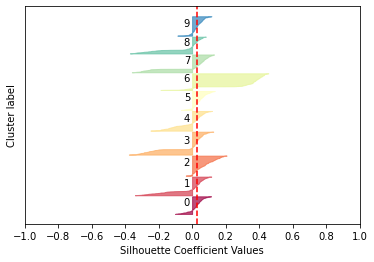

initialization : Cao        , clusters : 9     , silhouette score : 0.021


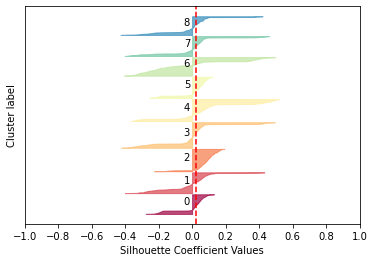

initialization : Cao        , clusters : 10    , silhouette score : 0.013


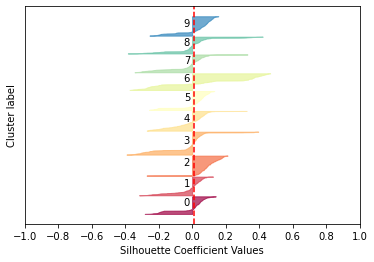

In [ ]:
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score ,silhouette_samples
import numpy as np
import matplotlib.pyplot as plt

# Define the range of clusters to test
clusters_range = range(2, 11)

# Define the initialization methods
init_methods = ['Cao', 'Huang', 'random']

# Define a list to store the results
results = []

# Loop over the initialization methods and number of clusters
for init_method in init_methods:
    for n_clusters in clusters_range:
        # Initialize K-Prototypes algorithm
        kproto = KPrototypes(n_clusters=n_clusters, init=init_method)
        
        # Fit the model
        clusters = kproto.fit_predict(df, categorical=[i for i in range(5,17)])
        
        # Compute the silhouette score
        silhouette_avg = silhouette_score(df, clusters)

        # Calculate silhouette values for each data point
        sample_silhouette_values = silhouette_samples(df, clusters)
        
        # Add the results to the list
        results.append((init_method, n_clusters, silhouette_avg,sample_silhouette_values))
        
# Sort the results by silhouette score in descending order
results_sorted = sorted(results, key=lambda x: x[2], reverse=True)

# Print the sorted results
for init_method, n_clusters, silhouette_avg,sample_silhouette_values in results_sorted:
    print("initialization : {:<10} , clusters : {:<5} , silhouette score : {:<5}".format(init_method,n_clusters,silhouette_avg.round(3)))

    # Plot silhouette graph
    fig, ax = plt.subplots()
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]

        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.get_cmap("Spectral")(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10

    ax.set_xlabel("Silhouette Coefficient Values")
    ax.set_ylabel("Cluster label")
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])
    ax.set_xticks([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

From result above , I choose initialization = 'Cao' and number of cluster = 2 because 

1.Has maximum silhouette score 

2.Each group hasn't negative Silhouette Coefficient

3.Each group has Silhouette Coefficient more than average silhouette score (Red dotted line)

4.Each group isn't wide fluctuations in the size of the silhouette plots

Silhouette score :
 
a measure of how similar an object is to its own cluster compared to other clusters. It is a value between -1 and 1, where a higher score indicates that the object is well-matched to its own cluster and poorly-matched to neighboring clusters. A score of 1 indicates that the object is far away from the neighboring clusters, while a score of -1 indicates that the object is assigned to the wrong cluster.

In the context of clustering, a high silhouette score means that the clusters are well-separated and the objects within each cluster are similar to each other. A score closer to 1 indicates a better clustering solution.

On the other hand, a low silhouette score indicates that the clusters are overlapping and the objects within each cluster are dissimilar to each other. A score closer to -1 indicates that the clustering solution is not appropriate.

Therefore, when using silhouette score to evaluate clustering solutions, the aim is to obtain a high score, as this indicates a better clustering solution.

In [302]:
kproto = KPrototypes(n_clusters=2, init='Cao')

clusters = kproto.fit_predict(df, categorical=[i for i in range(5,17)])
clusters

array([1, 1, 0, ..., 1, 1, 1], dtype=uint16)

From above , I get cluster of each row

In [303]:
df = pd.read_csv('Customers.csv')
df['Cluster'] = clusters
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Cluster
0,1,Male,19,15000,39,Healthcare,1,4,1
1,2,Male,21,35000,81,Engineer,3,3,1
2,3,Female,20,86000,6,Engineer,1,1,0
3,4,Female,23,59000,77,Lawyer,0,2,0
4,5,Female,31,38000,40,Entertainment,2,6,0
...,...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7,0
1996,1997,Female,91,73158,32,Doctor,7,7,0
1997,1998,Male,87,90961,14,Healthcare,9,2,1
1998,1999,Male,77,182109,4,Executive,7,2,1


In [304]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size', 'Cluster'],
      dtype='object')

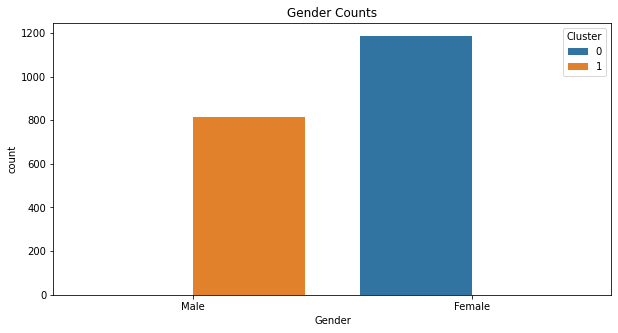

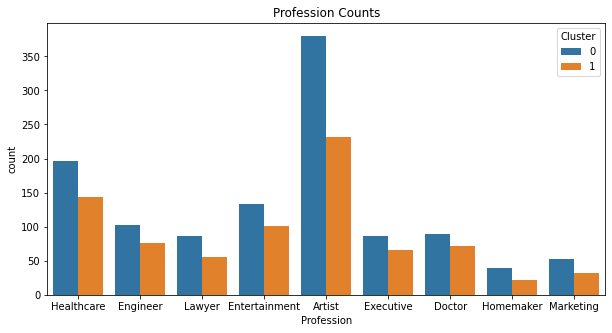

In [305]:
import seaborn as sns
import matplotlib.pyplot as plt

# cat_cols = ['Gender' , 'Profession']

for i in cat_cols:
    fig, ax = plt.subplots(figsize=(10,5))
    sns.countplot(x=i, data=df , hue='Cluster')
    plt.title(i+' Counts')
    plt.show()

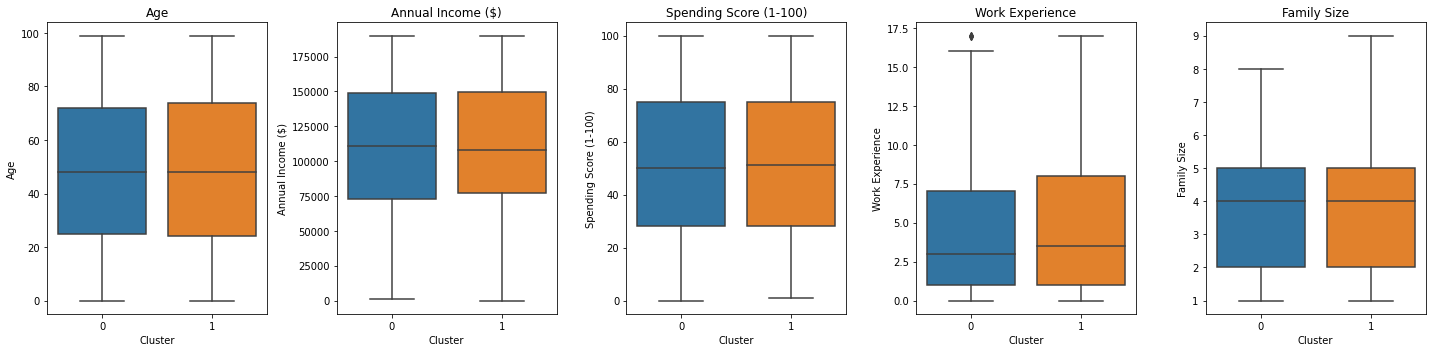

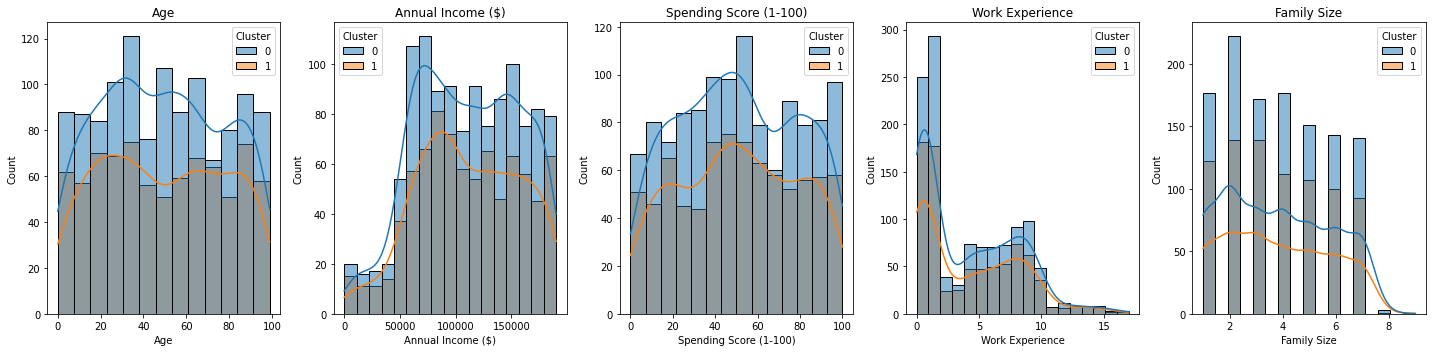

In [306]:
num_cols = ['Age' , 'Annual Income ($)' , 'Spending Score (1-100)' , 'Work Experience' , 'Family Size']

fig, axs = plt.subplots(ncols=5, figsize=(20, 5))
for i, col in enumerate(num_cols):
    sns.boxplot(x='Cluster', y=col, data=df, ax=axs[i])
    axs[i].set_title(col)
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(ncols=5, figsize=(20, 5))
for i, col in enumerate(num_cols):
    sns.histplot(x=col, data=df, ax=axs[i] ,hue='Cluster',kde=True)
    axs[i].set_title(col)
plt.tight_layout()
plt.show()

From above , It seems between cluster 0 and 1 aren't different 

So I decide to use statistics test for making sure

Gender & Cluster                                   has significant relation with chi-square = 1995.8588028136912 and p-value = 0.0


C:\Users\Panupong Jindarat\AppData\Local\Temp\ipykernel_26676\524908857.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_qual['Cluster'] = clusters


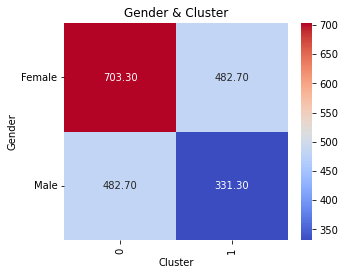

------------------------------------------------------------------------------------------------------------------------------------------------------
Profession & Cluster                               has insignificant relation with chi-square = 5.78717749228446 and p-value = 0.6710571979894521


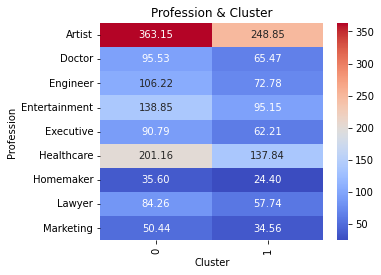

------------------------------------------------------------------------------------------------------------------------------------------------------
pair_sig : 
 ['Gender & Cluster'] 

pair_insig : 
 ['Profession & Cluster']


In [307]:
##### Part Categorical data : Gender & Profession ##### -> Using Chi-square test

from scipy.stats import chi2_contingency

# cat_cols = ['Gender' , 'Profession']

df_qual = df[cat_cols]
df_qual['Cluster'] = clusters 

pair_sig = []
pair_insig = []

for i in range(len(df_qual.columns)-1):
        grouped = df_qual.groupby([df_qual.iloc[:,i], df_qual.iloc[:,-1]]).size().reset_index(name="counts")
        contingency_table = grouped.pivot(index=df_qual.columns[i], columns='Cluster', values="counts").fillna(0).astype(int)

        # Extract the observed frequencies from the contingency table
        observed_frequencies = contingency_table.values

        chi2, p, dof, expected_frequencies = chi2_contingency(observed_frequencies)

        name = df_qual.columns[i] + ' & ' + 'Cluster'

        if p<0.05:
            print('{:<50} has significant relation with chi-square = {} and p-value = {}'.format(name,chi2,p))
            pair_sig.append(name)
        else:
            print('{:<50} has insignificant relation with chi-square = {} and p-value = {}'.format(name,chi2,p))
            pair_insig.append(name)

        # Create expected_frequencies
        fig, ax = plt.subplots(figsize=(5, 4))
        heatmap = sns.heatmap(expected_frequencies, annot=True, cmap="coolwarm", fmt=".2f", ax=ax)
        
        # Label the rows and columns
        ax.set_xticklabels(contingency_table.columns, rotation=90)
        ax.set_yticklabels(contingency_table.index, rotation=0)
        ax.set_xlabel('Cluster')
        ax.set_ylabel(df_qual.columns[i])
        ax.set_title(name)

        plt.show()
        print('-'*150)

print('pair_sig : \n {} \n'.format(pair_sig))
print('pair_insig : \n {}'.format(pair_insig))

From Chi-square test result , 

I summarize that cluster 0 and 1 are different in Gender 

In [308]:
##### Part Numeric data : [Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size] ##### 

# Check normality

from scipy.stats import kstest , shapiro

# num_cols = ['Age' , 'Annual Income ($)' , 'Spending Score (1-100)' , 'Work Experience' , 'Family Size']  

df_quan = df[num_cols]
df_quan['Cluster'] = clusters

pair_normal = []
pair_non_normal = []

for i in df_quan.columns[:-1]:
    for j in df['Cluster'].unique():
        df_filter = df_quan[[i,'Cluster']]
        df_filter = df_filter[df_filter['Cluster']==j]
        name = str(i) + ' & Cluster = '+str(j)
        print(name)
        print('len : {}'.format(len(df_filter)))

        if len(df_filter) > 50:

            statistics , pvalue = kstest(df_filter[i], 'norm')
            print('len > 50 : use kstest')
            print('p-value : {}\n' .format(pvalue))

            if pvalue < 0.05:
                print('Non-Normal')
                pair_non_normal.append(name)

            else:
                print('normal')
                pair_normal.append(name)

        else:
            statistics , pvalue = shapiro(df_filter[i], 'norm')
            print('len <= 50 : use shapiro')
            print('p-value : {}\n' .format(pvalue))
            
            if pvalue < 0.05:
                print('Non-Normal')
                pair_non_normal.append(name)

            else:
                print('normal')
                pair_normal.append(name)

        print('-'*40)

print('Normal : \n {} \n'.format(pair_normal))
print('Non-normal : \n {}'.format(pair_non_normal))

Age & Cluster = 1
len : 814
len > 50 : use kstest
p-value : 0.0

Non-Normal
----------------------------------------
Age & Cluster = 0
len : 1186
len > 50 : use kstest
p-value : 0.0

Non-Normal
----------------------------------------
Annual Income ($) & Cluster = 1
len : 814
len > 50 : use kstest
p-value : 0.0

Non-Normal
----------------------------------------
Annual Income ($) & Cluster = 0
len : 1186
len > 50 : use kstest
p-value : 0.0

Non-Normal
----------------------------------------
Spending Score (1-100) & Cluster = 1
len : 814
len > 50 : use kstest
p-value : 0.0

Non-Normal
----------------------------------------
Spending Score (1-100) & Cluster = 0
len : 1186
len > 50 : use kstest
p-value : 0.0

Non-Normal
----------------------------------------
Work Experience & Cluster = 1
len : 814
len > 50 : use kstest
p-value : 4.6404241127236175e-301

Non-Normal
----------------------------------------
Work Experience & Cluster = 0
len : 1186
len > 50 : use kstest
p-value : 0.0

No

C:\Users\Panupong Jindarat\AppData\Local\Temp\ipykernel_26676\4014161204.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quan['Cluster'] = clusters


No one is normal -> Using wilcoxon rank sum test (Non-parametric test)

In [309]:
# Check each group has different location or not?

from scipy.stats import ranksums

list_dif = []

for i in df_quan.columns[:-1]:
    df_filter = df_quan[[i,'Cluster']]
    data_1 = df_filter[df_filter['Cluster']==0][i]
    data_2 = df_filter[df_filter['Cluster']==1][i]

    statistics , pvalue = ranksums(data_1,data_2)

    print(i)
    print('p-value : {}'.format(pvalue))

    if pvalue<0.05:
        print('different')
        list_dif.append(i)
    else:
        print('same')

    print('-'*40)

print('Diff : \n{}'.format(list_dif))

Age
p-value : 0.805786382220981
same
----------------------------------------
Annual Income ($)
p-value : 0.7563349114174415
same
----------------------------------------
Spending Score (1-100)
p-value : 0.9667116316388532
same
----------------------------------------
Work Experience
p-value : 0.5585149952962939
same
----------------------------------------
Family Size
p-value : 0.9746298560463712
same
----------------------------------------
Diff : 
[]


From above , All group are the same ,

So I summarize there isn't bewteen cluster 0 and 1 of each group

# Summary :

# I decide to seperate Customers data to 2 groups which have significantly different between only Gender aspect :

# Cluster 0 : Female 
# Cluster 1 : Male

# The rest aspects , there isn't different between 2 groups